# Name - Pradeep More
Task3 - Boston House Price Prediction

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Metadata

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town

CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000usd

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000s dollars

Each record in the database describes a Boston suburb or town.

# 2. Importing Dataset

In [2]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("F:/Sync Intern's/housing.csv", header=None, delimiter=r"\s+", names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 3. Data Preprocessing and EDA

In [3]:
df.shape

(506, 14)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


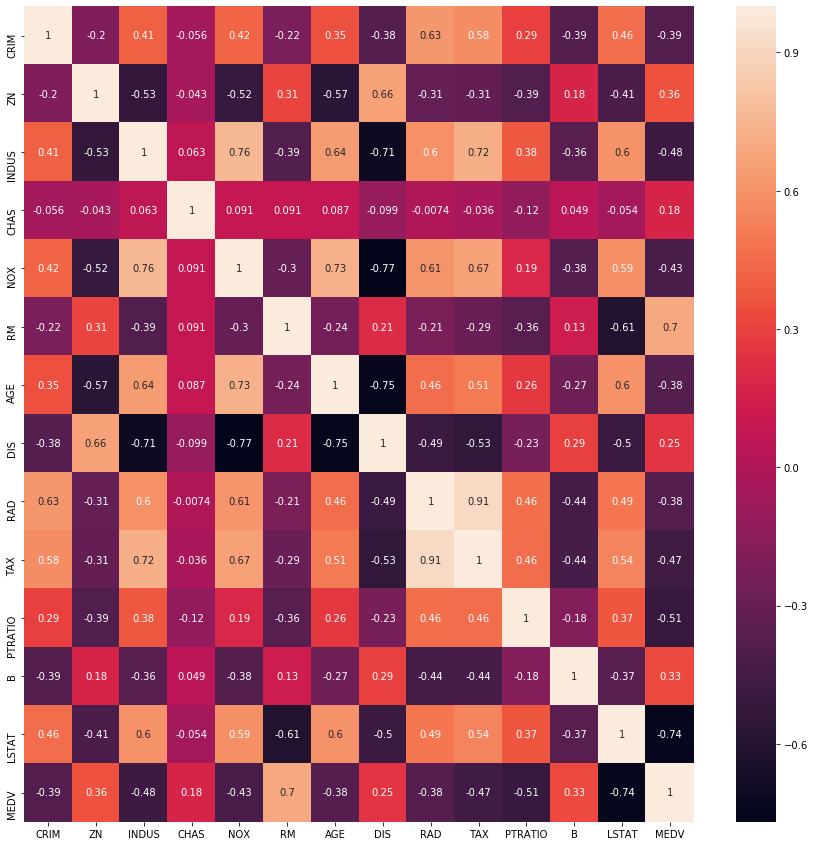

In [9]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot = True)

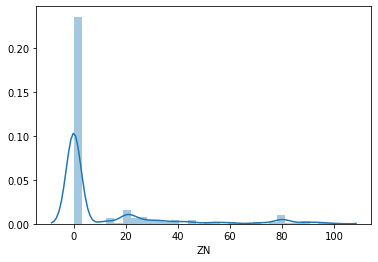

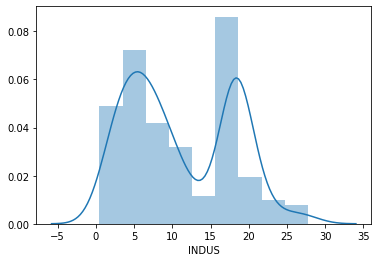

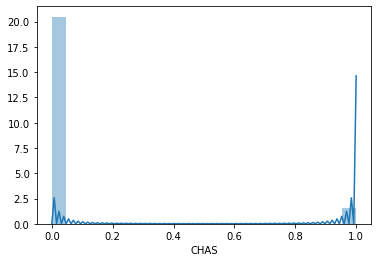

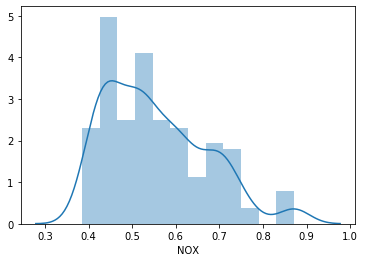

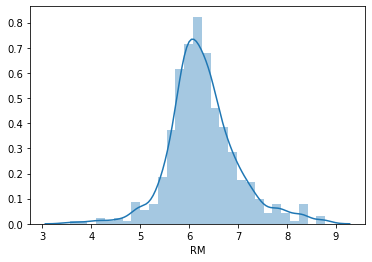

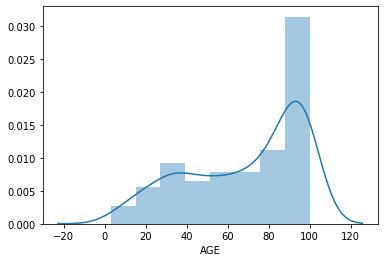

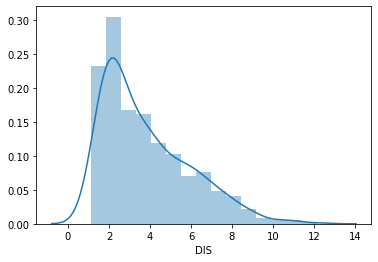

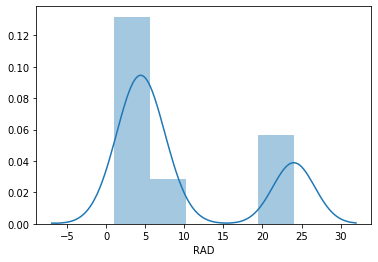

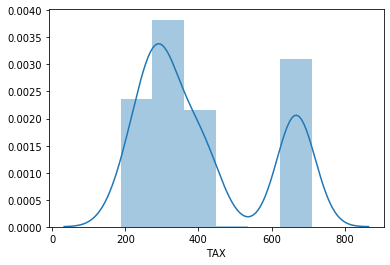

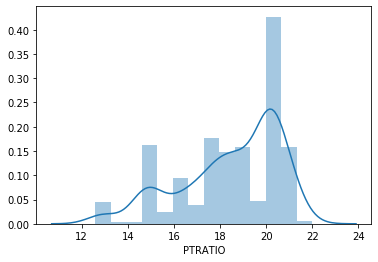

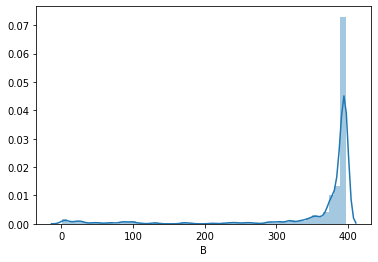

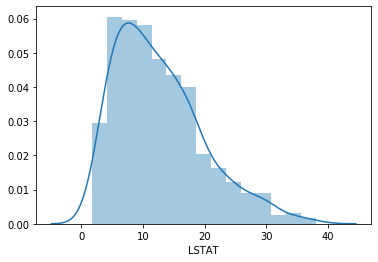

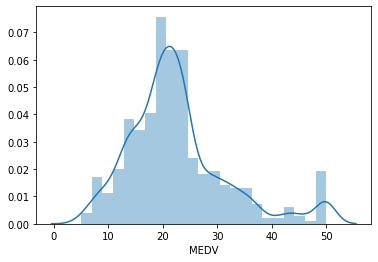

In [10]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    distplots(i)

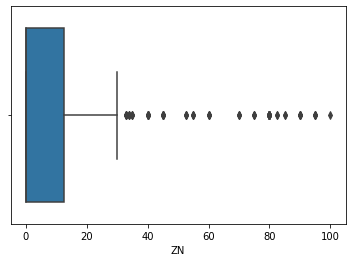

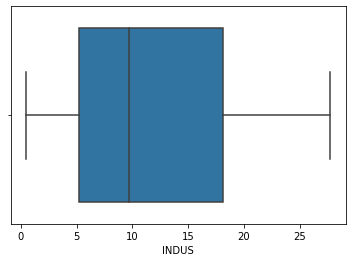

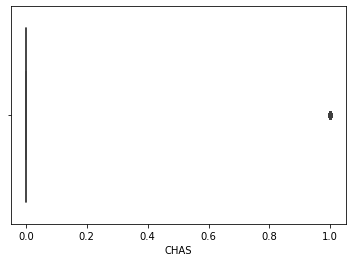

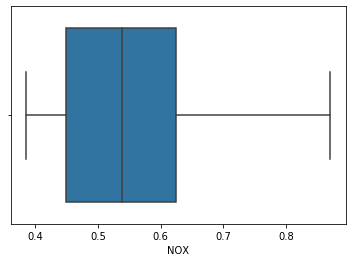

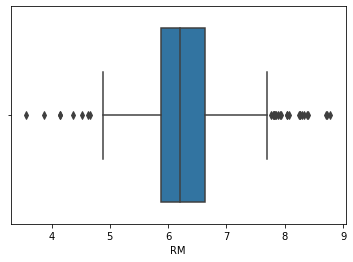

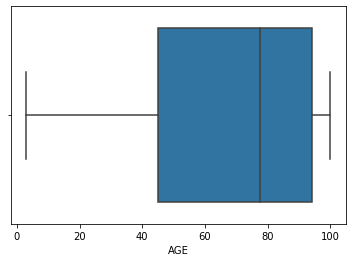

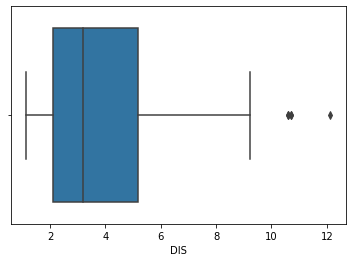

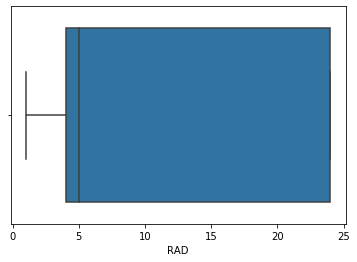

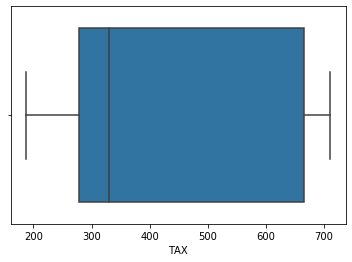

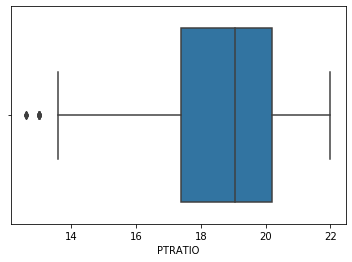

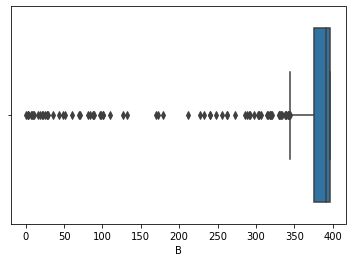

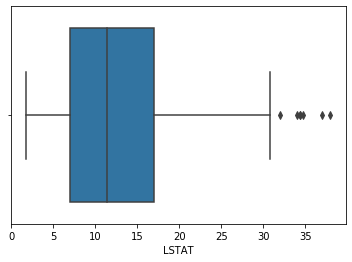

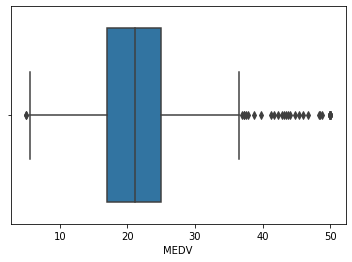

In [11]:
#Outliers Detection & Remove
def boxf(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxf(i)

# Treating outliers in the continuous columns

1) Outliers can be treated in a variety of ways. It depends on the skewness of the feature.

2) To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.

3) To reduce left skewness, we take squares or cubes or higher powers.

4) But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.

5) Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

Lets' write a function below that treats all the outliers in the numeric features using winsorization.

In [12]:
# Function to detect outliers in every feature
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


As per the IQR methodology, there are outliers in majority of the columns.

In [13]:
from scipy.stats.mstats import winsorize

# Function to treat outliers 

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)

# Checking for outliers after applying winsorization
# We see this using a fuction called 'detect_outliers', defined above.

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,0
4,NOX,0
5,RM,0
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


We can see that the outliers are removed. The outliers, shown above, in columns CRIM,ZN and B are actually not outliers. They are the majority values present in out dataset.

# 4. Splitting the data into Input and Output Variables

In [14]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02763,18.0,2.31,0,0.538,6.575,65.2,4.0900,2,296.0,15.3,396.90,4.98
1,0.02763,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02763,0.0,7.07,0,0.469,7.155,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,3.70
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [16]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    34.9
Name: MEDV, dtype: float64

# 5. Splitting the dataset into the Training set and Test set

In [17]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# 6. Model Building

# Model1: Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
# print the intercept
print(regressor.intercept_)

32.677833694903356


In [21]:
y_pred = regressor.predict(X_test)
y_pred 

array([28.22766396, 32.55185971, 14.74022618, 25.15117505, 17.96817475,
       22.61596563, 16.77729518, 13.98527546, 22.61206974, 20.44844464,
       20.57089129, 17.31344296,  6.93467448, 21.28334607, 19.27534675,
       25.3454376 , 18.5186781 ,  9.69359709, 34.4172488 , 15.35295182,
       27.08094874, 29.51790453, 10.79841552, 23.90238699, 16.97182266,
       14.64105649, 22.88646968, 13.56258916, 18.61448357, 19.27978527,
       22.04242301, 25.07521485, 22.62569253, 19.5016862 , 16.19833792,
       17.92731319, 29.85812069, 20.53079193, 20.29532707, 24.48342964,
       13.98298539, 31.60123097, 35.48892974, 17.64657629, 26.70289854,
       15.99296085, 13.74902754, 25.67070946, 19.77285854, 29.39924685,
       20.174226  , 33.08674506, 15.22696679, 26.08754034, 34.91794656,
       22.73138685, 18.34265194, 31.15345751, 24.60929205, 14.48032084,
       24.11808503, 30.68832442, 31.52929829, 16.9014098 , 25.64518461,
       12.97340565, 18.26769396, 26.01742697, 29.56900793, 12.84

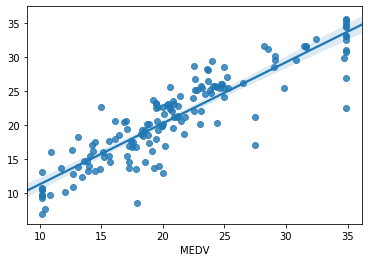

In [22]:
sns.regplot(y_test,y_pred)

In [23]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2.184429818717256
MAPE is 0.11163097477012664
MSE is 9.210305331642877
R2 score is 0.7919945232424748
RMSE score is 3.034848485780283


# Model2: XGBoost Regression

In [24]:
# define model
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the model
pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
r2 = metrics.r2_score(y_test, pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1.7543806515241924
MAPE is 0.08943706106731575
MSE is 5.910998835833131
R2 score is 0.8665060400618301
RMSE score is 2.431254580629748


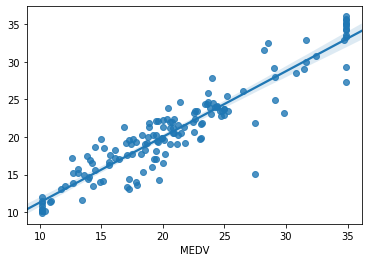

In [30]:
sns.regplot(y_test,pred)

# Model3: Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
modeldt = DecisionTreeRegressor(random_state = 0)
modeldt.fit(X_train, y_train)
y_pred1 = modeldt.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred1)
mape = mean_absolute_percentage_error(y_test, y_pred1)
mse = metrics.mean_squared_error(y_test, y_pred1)
r2 = metrics.r2_score(y_test, y_pred1)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2.5296052631578947
MAPE is 0.12849683683050236
MSE is 13.829802631578945
R2 score is 0.6876678257385271
RMSE score is 3.718844260194146


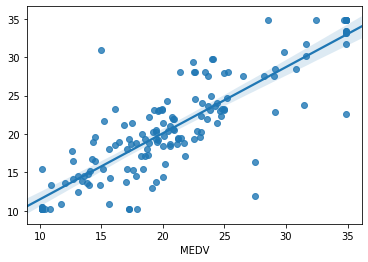

In [32]:
sns.regplot(y_test,y_pred1)

# Model4: Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
modelrf = RandomForestRegressor(n_estimators = 10, random_state = 0)
modelrf.fit(X_train, y_train)
y_pred2 = modelrf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)
mse = metrics.mean_squared_error(y_test, y_pred2)
r2 = metrics.r2_score(y_test, y_pred2)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1.8200657894736845
MAPE is 0.09305423908374306
MSE is 6.838784868421053
R2 score is 0.8455529262302607
RMSE score is 2.615107047220257


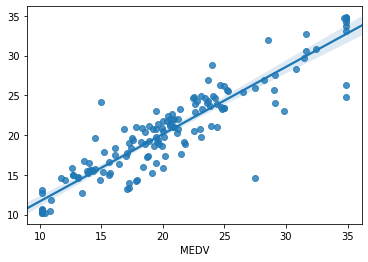

In [35]:
sns.regplot(y_test,y_pred2)